### Sales Prediction (Simple Linear Regression)
Problem Statement¶
Build a model which predicts sales based on the money spent on different platforms for marketing.

Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

#### Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adv = pd.read_csv('advertising.csv')

In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Data Inspection

In [5]:
adv.shape

(200, 4)

In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Data Cleaning

In [10]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

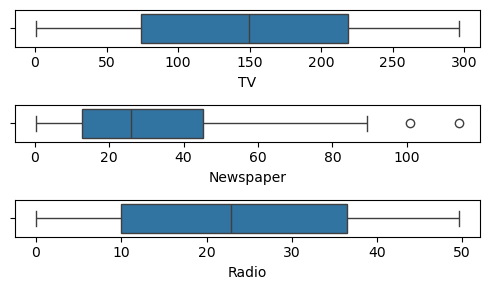

In [17]:
# Outlier Analysis
fig, axs = plt.subplots(3,figsize=(5,3))
plt1 = sns.boxplot(adv['TV'], ax=axs[0],orient='h')
plt2 = sns.boxplot(adv['Newspaper'], ax=axs[1],orient='h')
plt3 = sns.boxplot(adv['Radio'], ax=axs[2],orient='h')
plt.tight_layout()

#### EDA
##### Univariate Analysis
* Sales(Target Variable)

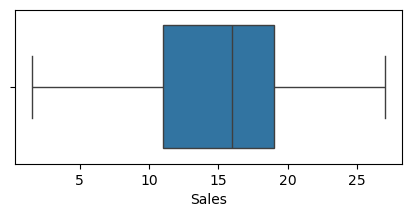

In [22]:
fig, axs = plt.subplots(figsize=(5,2))

sns.boxplot(adv['Sales'],orient='h')
plt.show()

<Figure size 500x200 with 0 Axes>

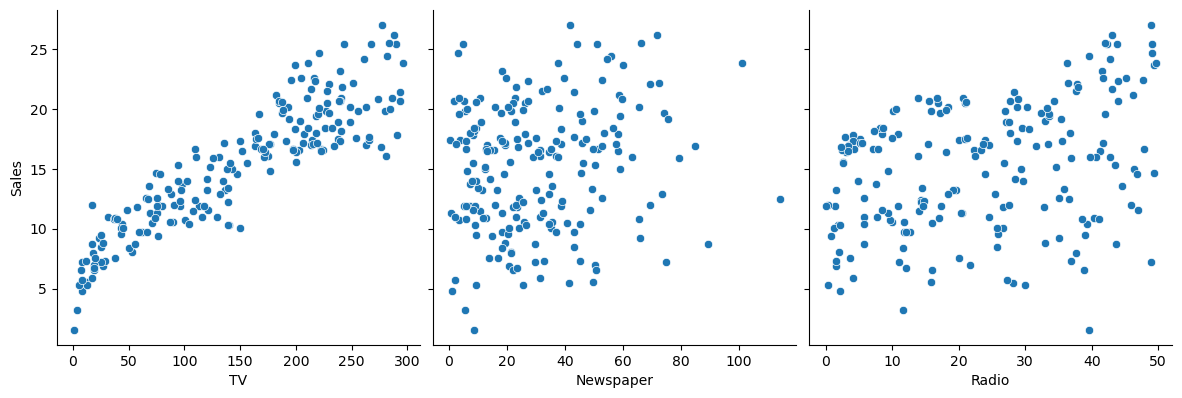

In [36]:
# Let's see how Sales are related with other variables using scatter plot
plt.figure(figsize=(5,2))
sns.pairplot(adv, x_vars=['TV','Newspaper','Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

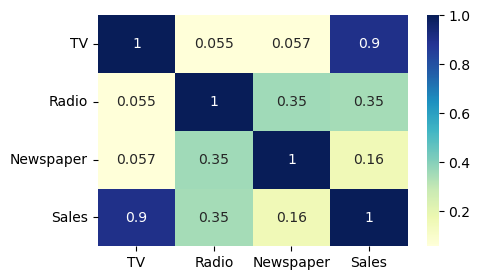

In [32]:
plt.figure(figsize=(5,3))
sns.heatmap(adv.corr(),cmap='YlGnBu',annot=True)
plt.show()

### Model Building
Performing Simple Linear Regression

#### Generic Steps in model building using statsmodels
-- We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [40]:
X = adv['TV']
y = adv['Sales']

#### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [42]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [43]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [44]:
### Building a Linear Model
import statsmodels.api as sm

In [ ]:
## Add constant to get an intercept
X_train_sm = sm.add_constant(X_train)

## Fit the regression line using 'OLS'
lr = sm.OLS(y_train,X_train_sm).fit()

In [47]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.52e-52
Time:                        00:11:07   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

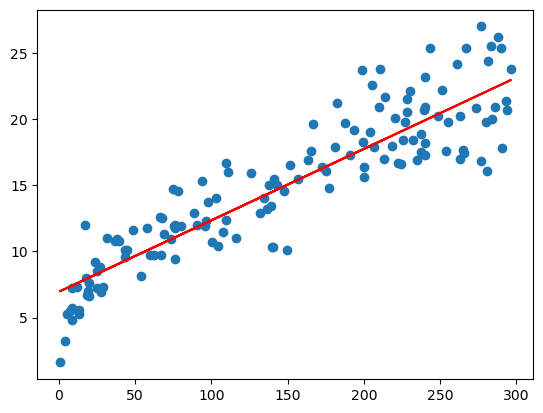

In [49]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

In [50]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

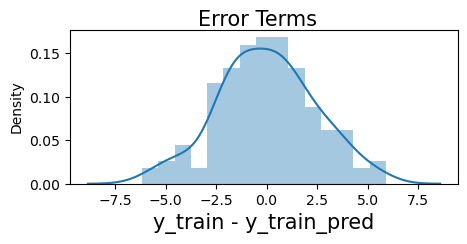

In [54]:
fig = plt.figure(figsize=(5,2))
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

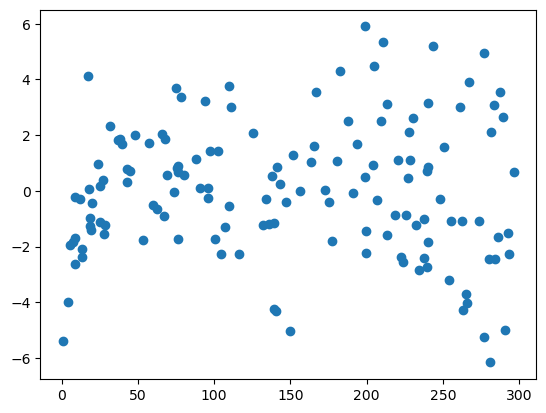

In [55]:
plt.scatter(X_train,res)
plt.show()

In [56]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [57]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966232

In [60]:
r_sqrd = r2_score(y_test, y_pred)
r_sqrd

0.7921031601245659

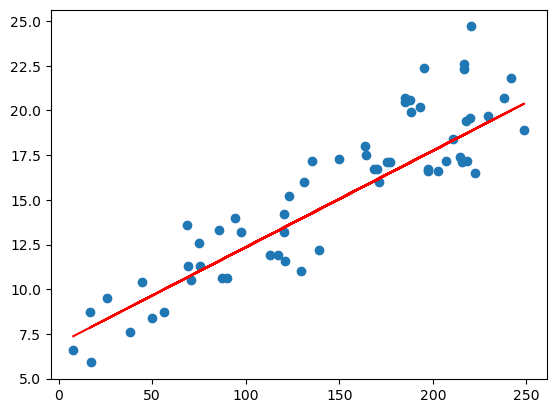

In [61]:
plt.scatter(X_test,y_test)
plt.plot(X_test, 6.948+0.054*X_test,'r')
plt.show()